In [2]:

!pip install matplotlib seaborn pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Defaulting to user installation because normal site-packages is not writeable


In [6]:
data = pd.read_csv("healthcare_data_set.csv")

In [7]:
data.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [22]:
####Examine Distributions of Individual Variables

# variables to check

key_vars = ["Age", "BMI", "MentHlth", "PhysHlth"]

In [41]:
# Style
sns.set(style="whitegrid")

In [42]:
# Plot distributions
for var in key_vars:
    plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

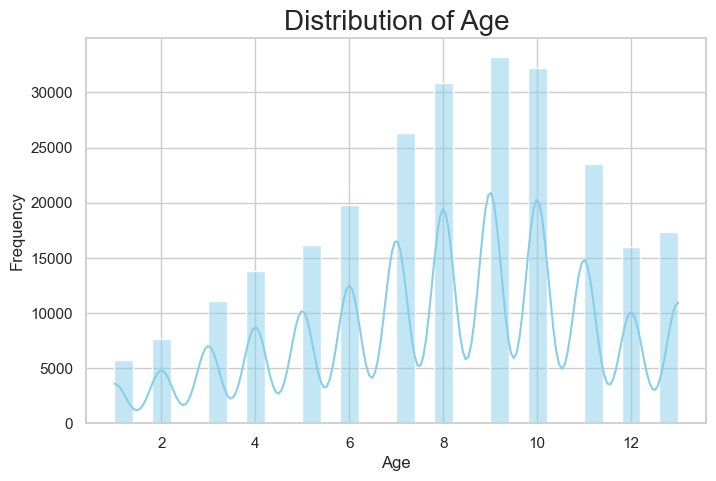

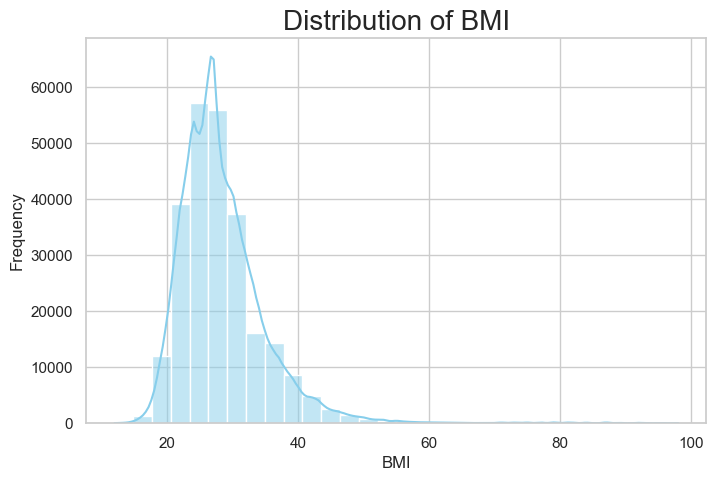

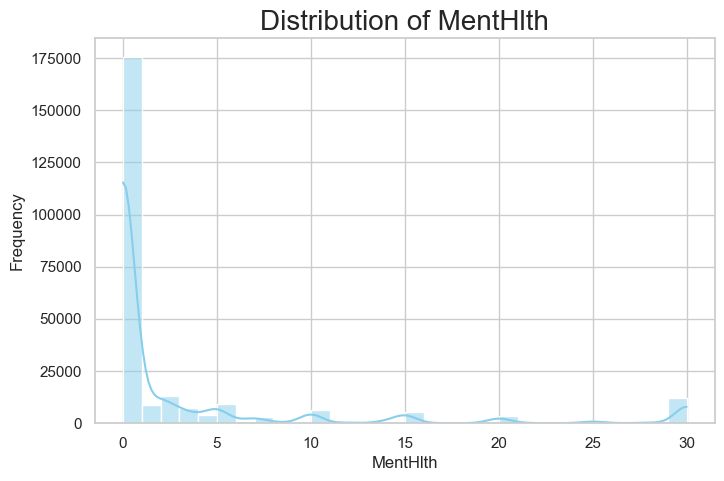

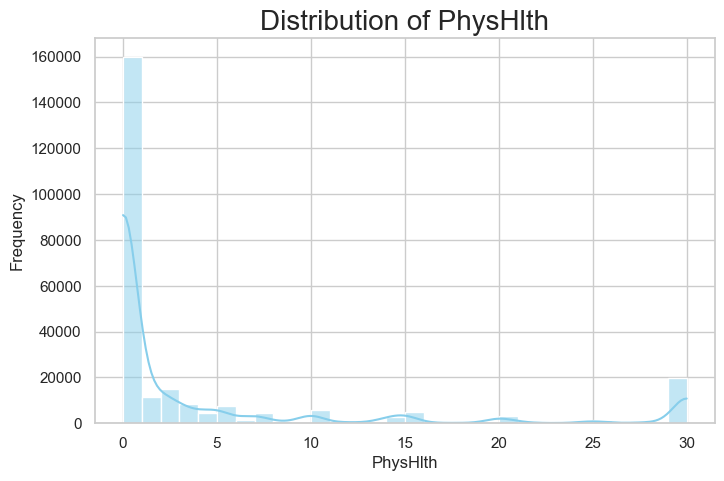

In [43]:
# Plot histograms
for var in key_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {var}", fontsize=20)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

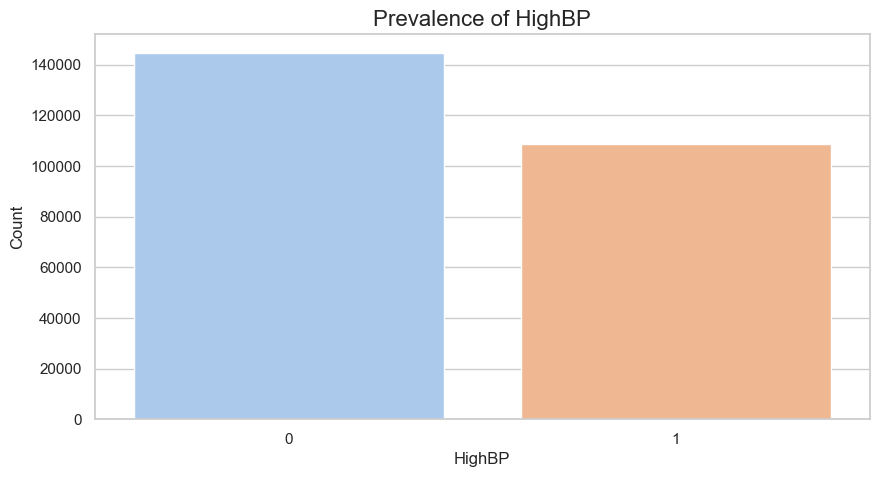

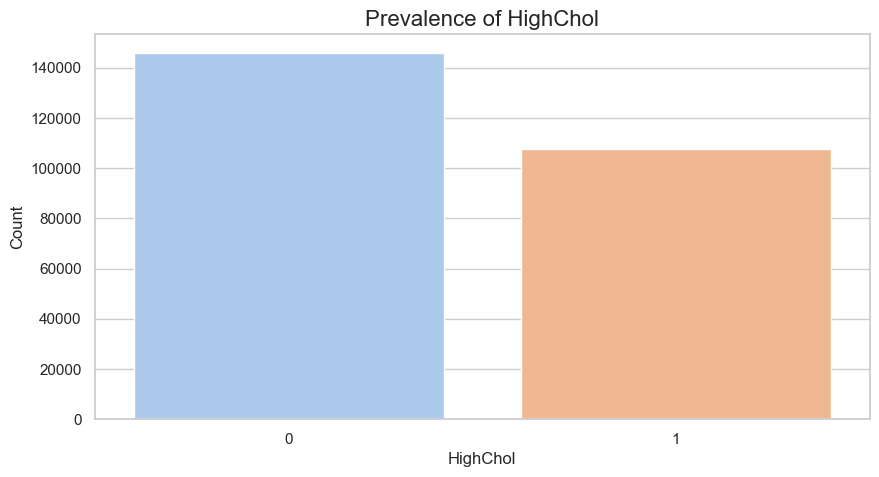

In [44]:
#########Investigate Prevalence of Health Conditions


#health condition columns
health_vars = ["HighBP", "HighChol"]
# bar chart
for var in health_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=data, hue=var, palette="pastel", legend=False)
    plt.title(f"Prevalence of {var}", fontsize=16)
    plt.xlabel(var)
    plt.ylabel("Count")

    plt.show()
    

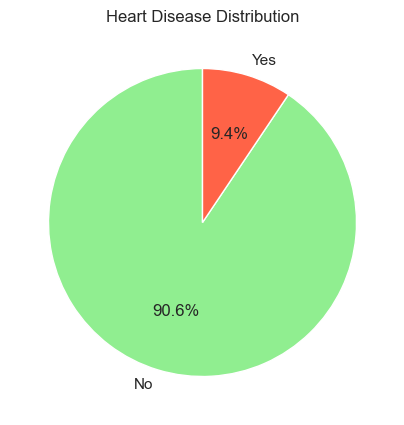

In [45]:
###################### Analyze Distribution of Heart Disease (Target Variable)

####Pie Chart

plt.figure(figsize=(5,5))
data['HeartDiseaseorAttack'].value_counts().plot.pie(
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'tomato'],
    startangle=90)

plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()


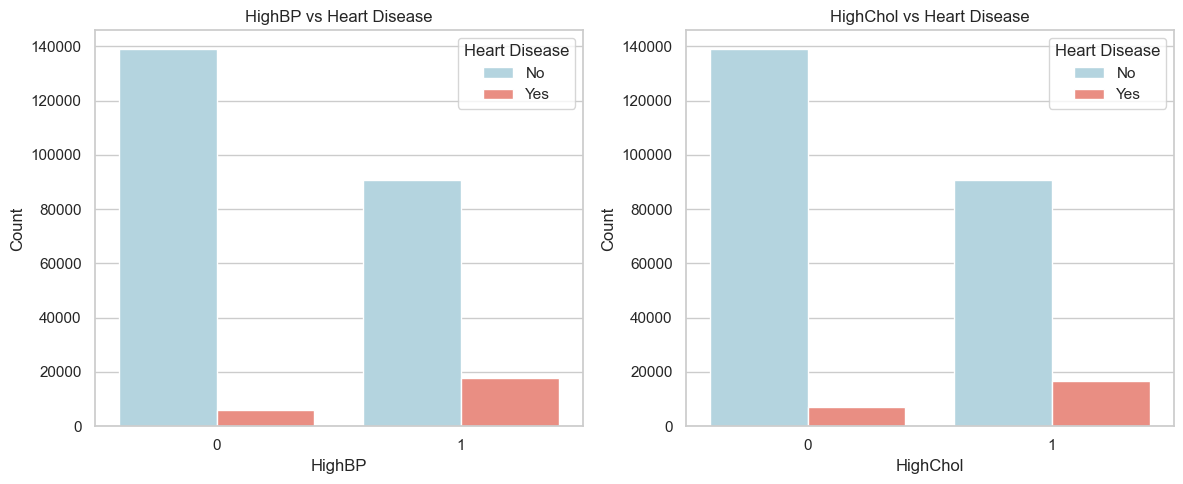

In [48]:
###################Explore Relationships with Heart Disease

##Categorical Variables: HighBP & HighChol.

categorical_vars = ['HighBP', 'HighChol']

plt.figure(figsize=(12, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(x=var, hue='HeartDiseaseorAttack', data=data, palette=['lightblue', 'salmon'])
    plt.title(f'{var} vs Heart Disease')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()




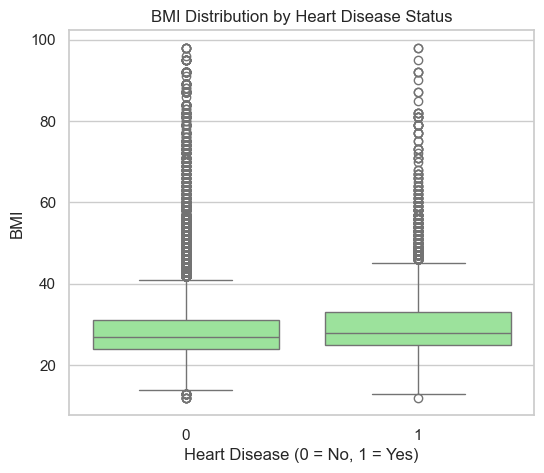

In [50]:
plt.figure(figsize=(6,5))
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=data, color='lightgreen')
plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()



In [ ]:
print(data.columns)


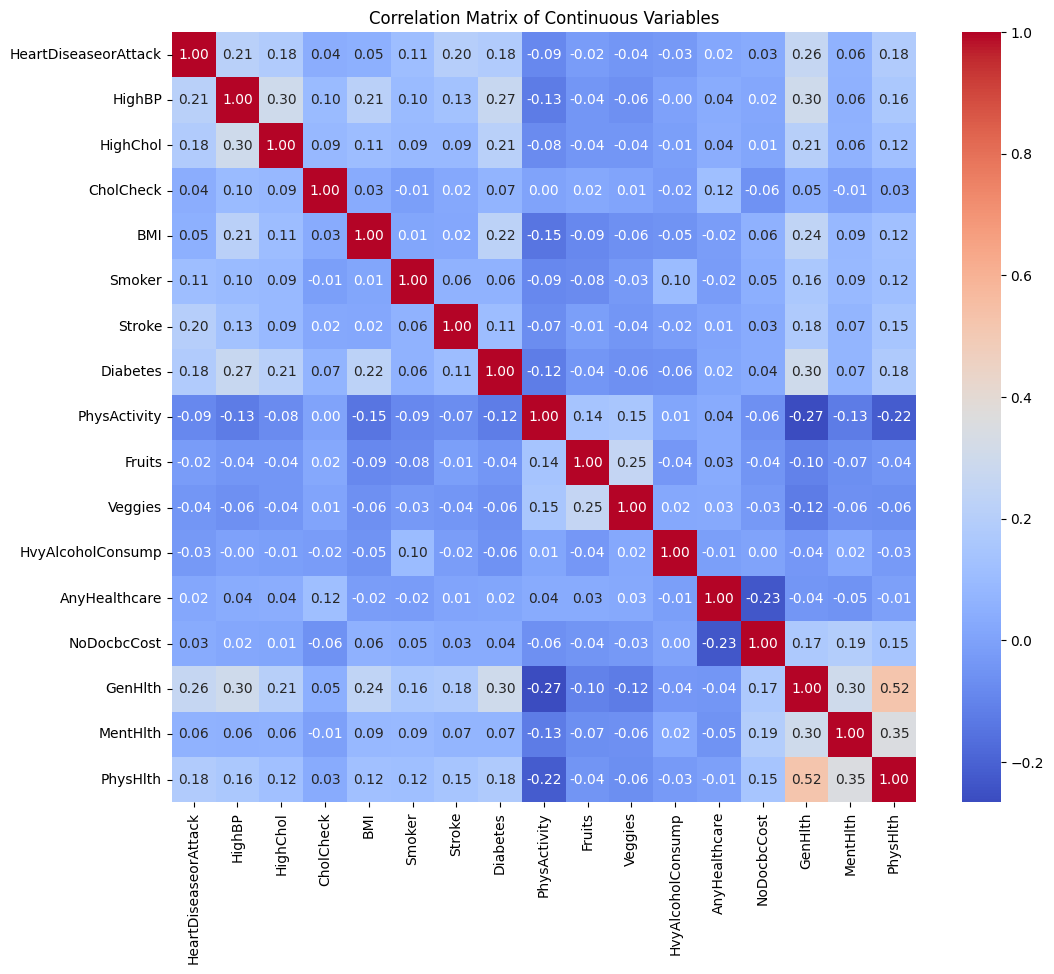

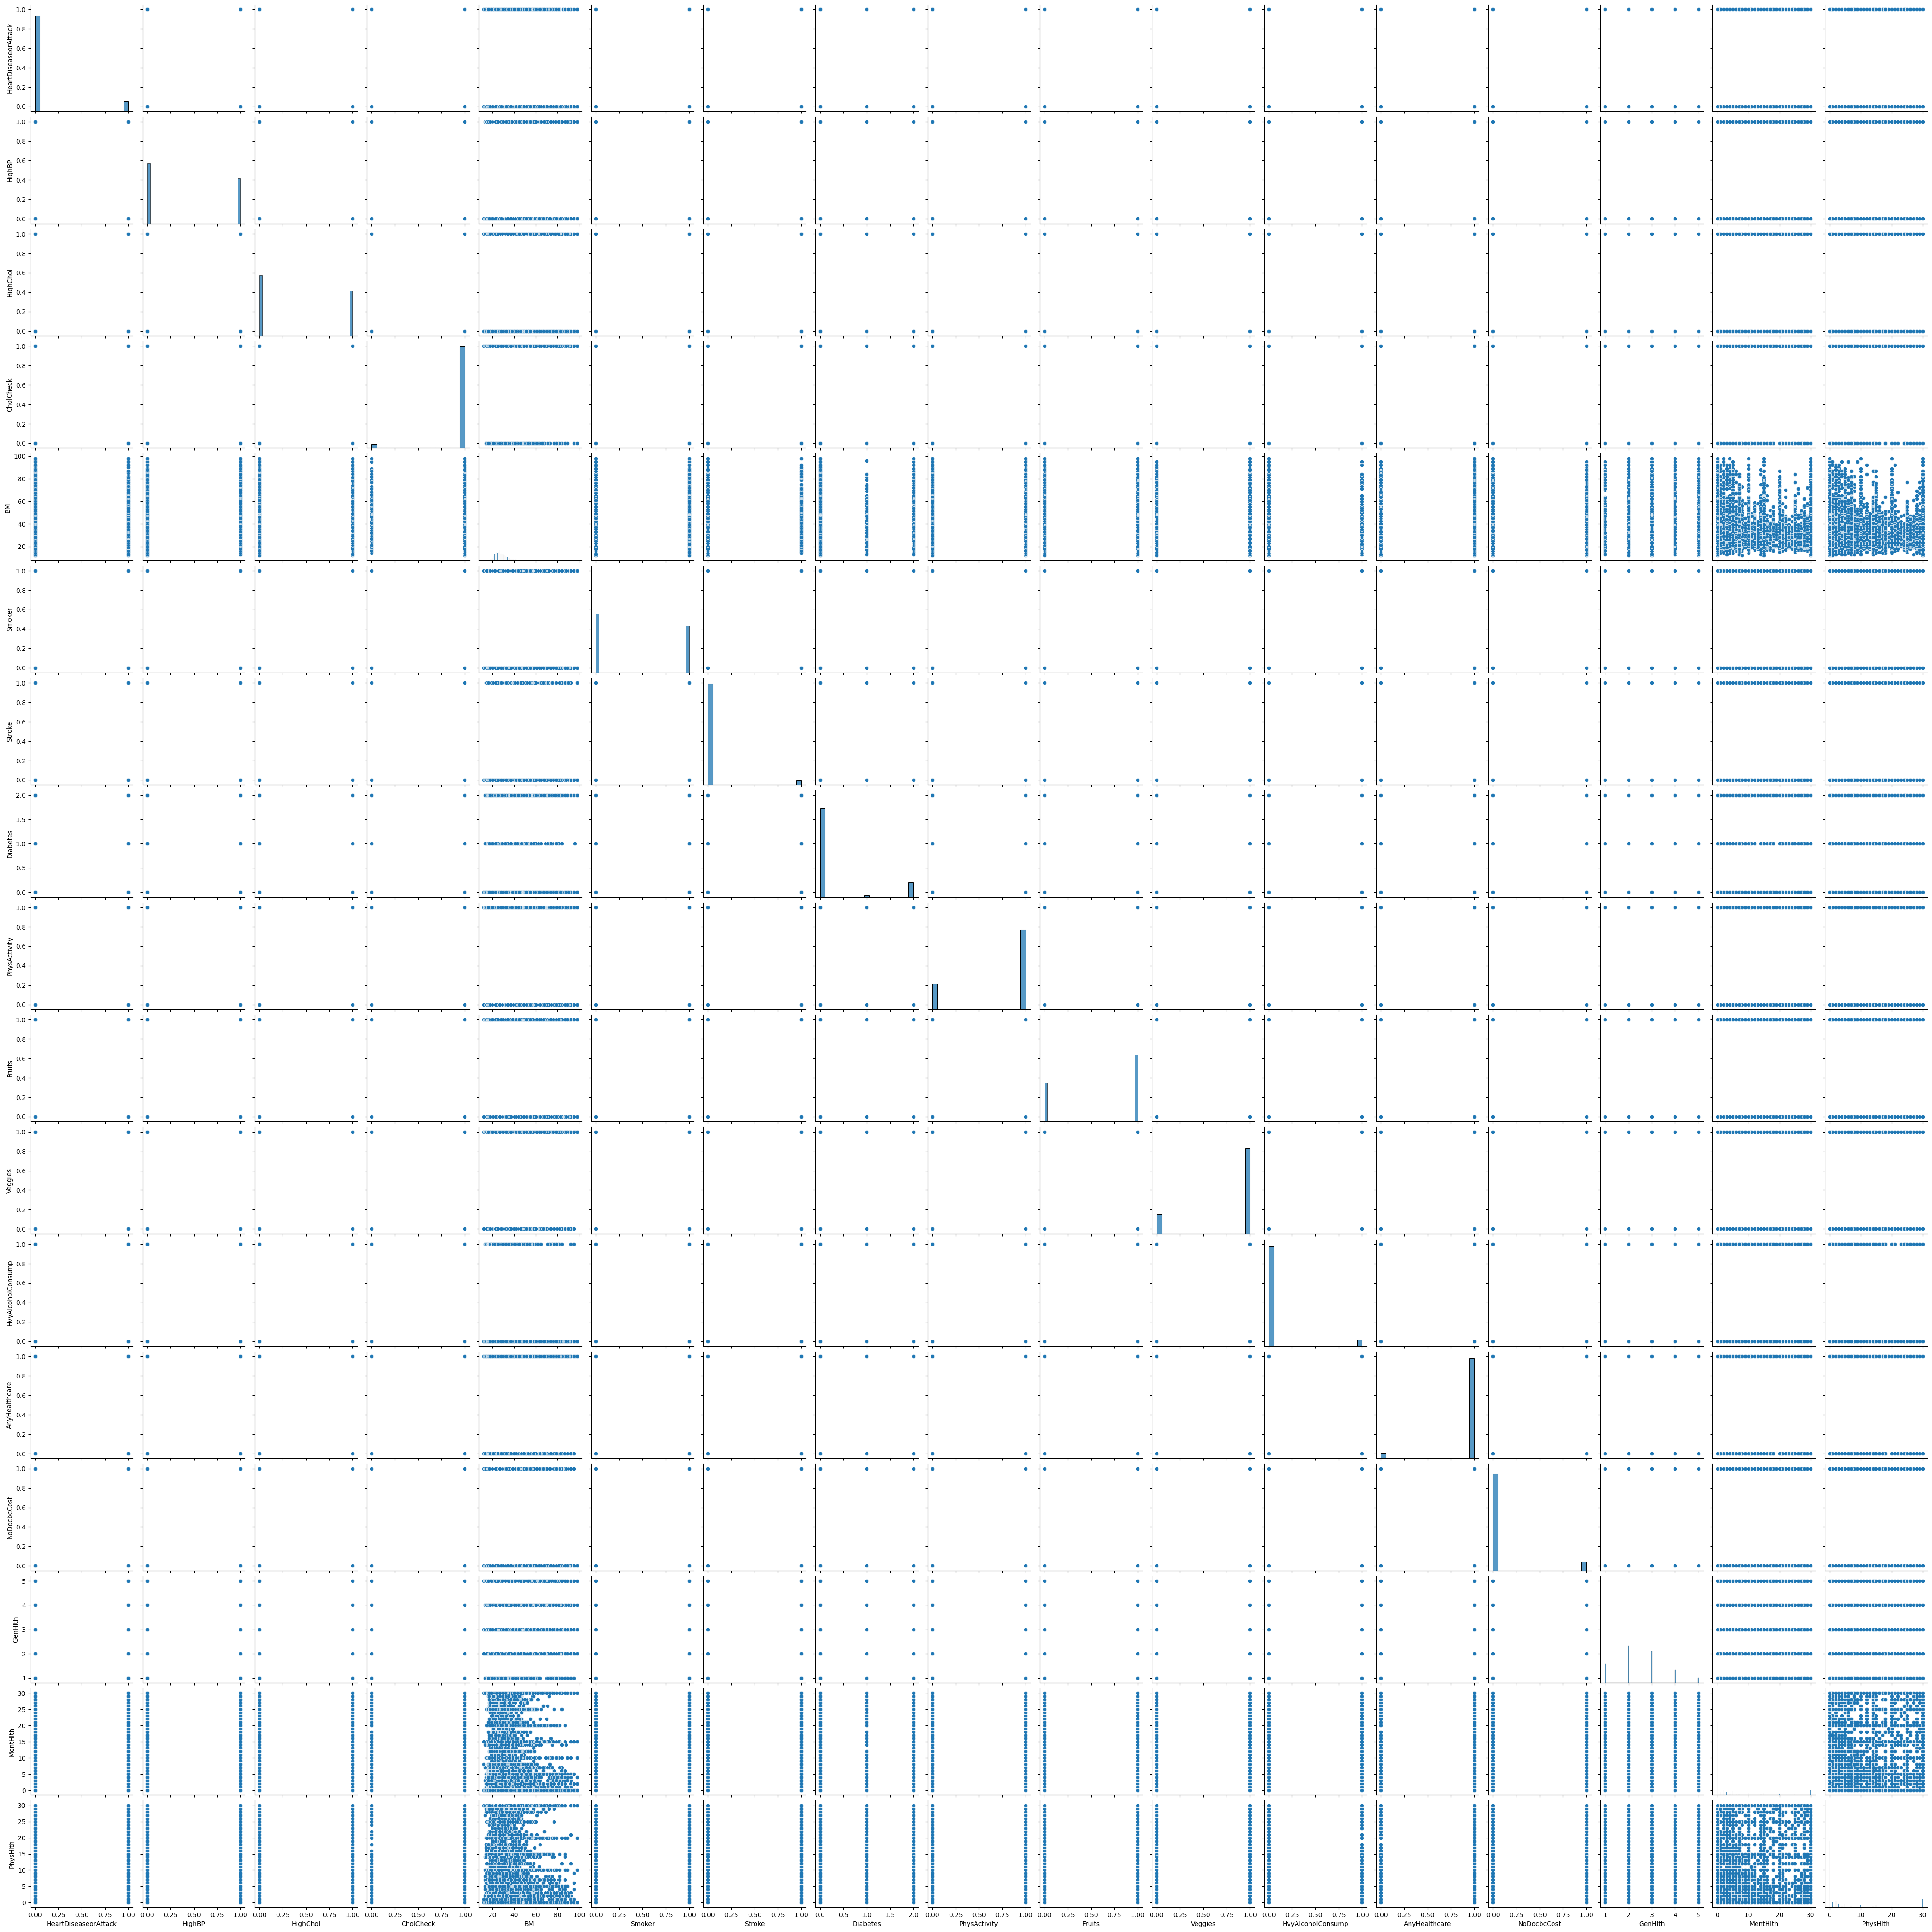

In [10]:
#################    Visualize Correlations Between Variables:

# List of continuous variables
continuous_vars = [
    'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
    'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth'
]

# 1. Correlation Matrix Heatmap
plt.figure(figsize=(12,10))
corr_matrix = data[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

# 2. Pairwise Scatter Plots (Pairplot)
sns.pairplot(data[continuous_vars])
plt.show()




     Prevalence   Total  PrevalencePercent
Sex                                       
0      0.071879  141974           7.187936
1      0.122536  111706          12.253594


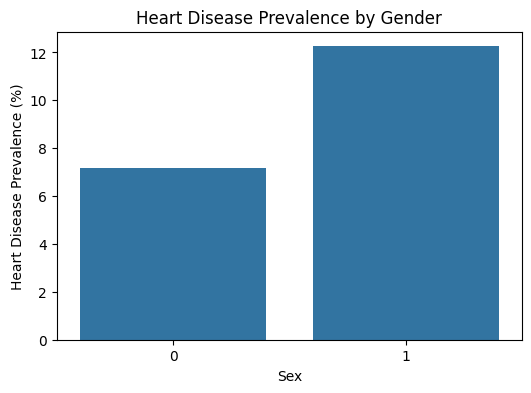

In [11]:
####################Compare Heart Disease Across Demographic Groups

###Heart disease prevalence by gender

gender_pivot = data.pivot_table(
    index='Sex',                  # replace with your gender column if different
    values='HeartDiseaseorAttack',
    aggfunc=['mean', 'count']
)

# Rename columns for clarity
gender_pivot.columns = ['Prevalence', 'Total']
gender_pivot['PrevalencePercent'] = gender_pivot['Prevalence'] * 100
print(gender_pivot)

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=gender_pivot.index, y=gender_pivot['PrevalencePercent'])
plt.ylabel('Heart Disease Prevalence (%)')
plt.title('Heart Disease Prevalence by Gender')
plt.show()

In [77]:

print(data.columns.tolist())


['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='HeartDiseaseorAttack', data=pivot, palette="Set2")


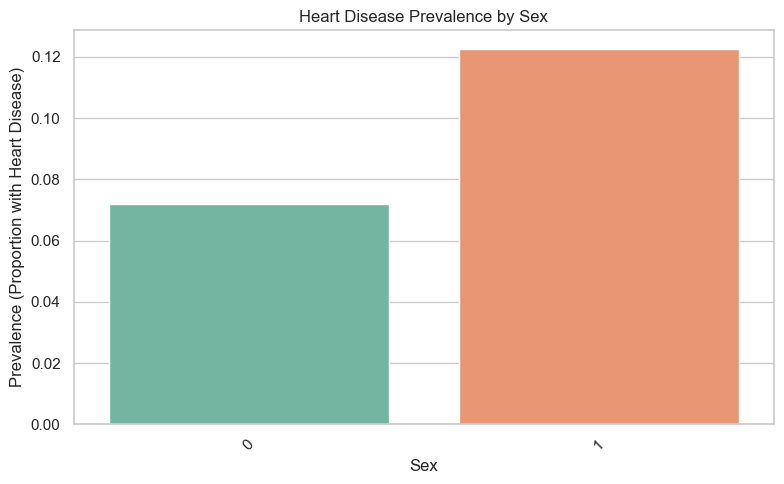

C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = data.groupby(group_col)['HeartDiseaseorAttack'].mean().reset_index()
C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='HeartDiseaseorAttack', data=pivot, palette="Set2")


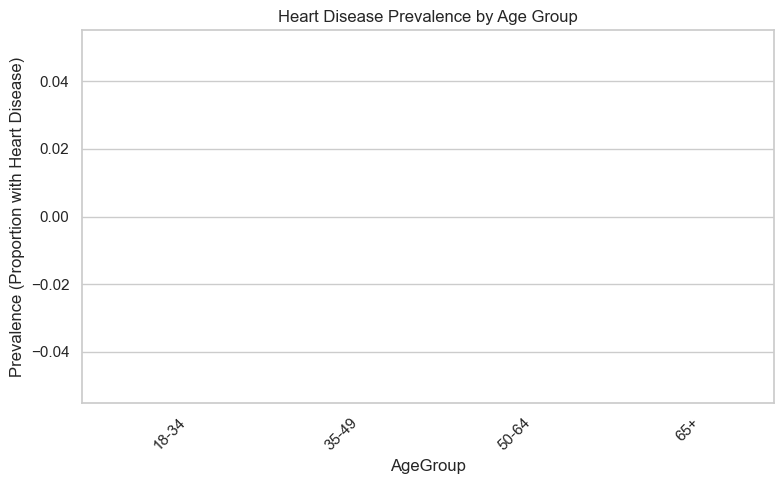

C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='HeartDiseaseorAttack', data=pivot, palette="Set2")


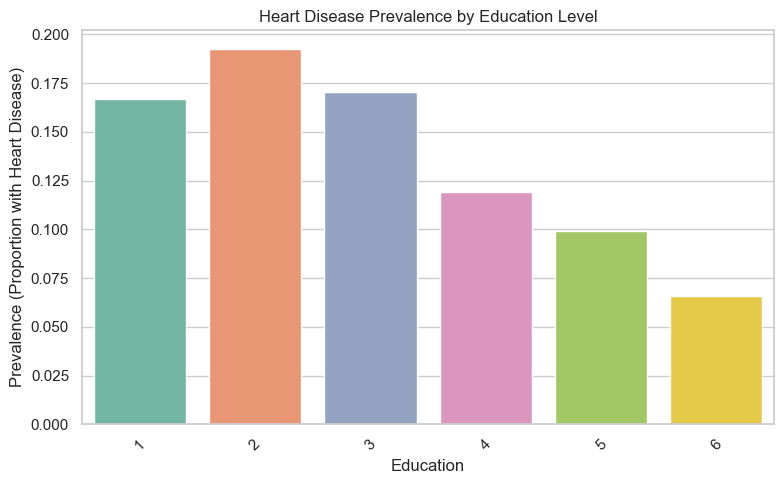

C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='HeartDiseaseorAttack', data=pivot, palette="Set2")


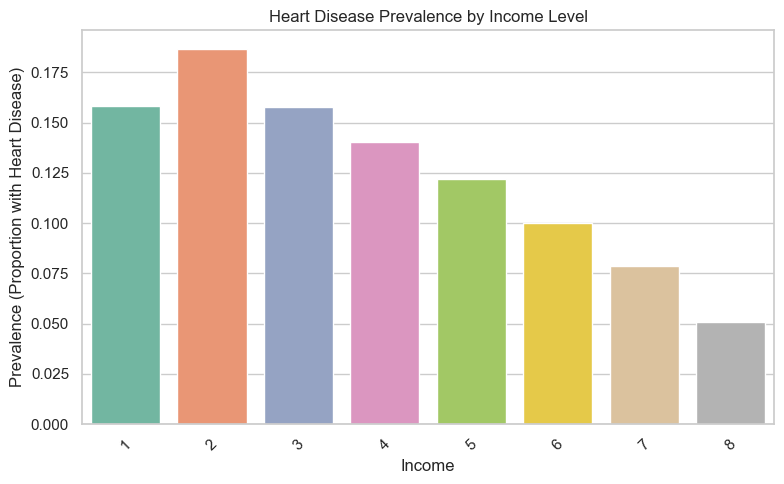


Heart Disease Prevalence by Demographic Groups (%):
Empty DataFrame
Columns: []
Index: []


C:\Users\seeth\AppData\Local\Temp\ipykernel_12608\469345797.py:39: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_summary = pd.pivot_table(


In [15]:

# Set seaborn style
sns.set(style="whitegrid")

# --------------------------
# Create Age Groups
# --------------------------
bins = [18, 34, 49, 64, 100]
labels = ['18-34', '35-49', '50-64', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# --------------------------
# Function: Plot Heart Disease prevalence across groups
# --------------------------
def plot_heart_disease_by_group(data, group_col, title=None):
    # Compute prevalence (mean of 0/1 variable)
    pivot = data.groupby(group_col)['HeartDiseaseorAttack'].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(x=group_col, y='HeartDiseaseorAttack', data=pivot, palette="Set2")

    plt.title(title if title else f"Heart Disease Prevalence by {group_col}")
    plt.ylabel("Prevalence (Proportion with Heart Disease)")
    plt.xlabel(group_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------------------------
# Bar Charts for Demographics
# --------------------------
plot_heart_disease_by_group(data, 'Sex', "Heart Disease Prevalence by Sex")
plot_heart_disease_by_group(data, 'AgeGroup', "Heart Disease Prevalence by Age Group")
plot_heart_disease_by_group(data, 'Education', "Heart Disease Prevalence by Education Level")
plot_heart_disease_by_group(data, 'Income', "Heart Disease Prevalence by Income Level")

# --------------------------
# Pivot Table Summary
# --------------------------
pivot_summary = pd.pivot_table(
    data,
    values='HeartDiseaseorAttack',
    index=['Sex','AgeGroup','Education','Income'],
    aggfunc='mean'
)

print("\nHeart Disease Prevalence by Demographic Groups (%):")
print((pivot_summary * 100).round(1))  # show percentages




   